In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
employment_df = pd.read_csv('C:/Users/ADMIN/Downloads/employment_data.csv')

In [5]:
employment_df

,REF_DATE,GEO,DGUID,Labour force characteristics,Gender,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020,Canada,2021A000011124,Unemployment rate,Total - Gender,15 years and over,Percent,239,units,0,v1063541804,1.8.1.1,9.7,NaN,NaN,NaN,1
1,2021,Canada,2021A000011124,Unemployment rate,Total - Gender,15 years and over,Percent,239,units,0,v1063541804,1.8.1.1,7.5,NaN,NaN,NaN,1
2,2022,Canada,2021A000011124,Unemployment rate,Total - Gender,15 years and over,Percent,239,units,0,v1063541804,1.8.1.1,5.3,NaN,NaN,NaN,1
3,2023,Canada,2021A000011124,Unemployment rate,Total - Gender,15 years and over,Percent,239,units,0,v1063541804,1.8.1.1,5.4,NaN,NaN,NaN,1
4,2024,Canada,2021A000011124,Unemployment rate,Total - Gender,15 years and over,Percent,239,units,0,v1063541804,1.8.1.1,6.3,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2020,British Columbia,2021A000259,Employment rate,Women+,15 years and over,Percent,239,units,0,v1063549900,11.10.3.1,54.7,NaN,NaN,NaN,1
491,2021,British Columbia,2021A000259,Employment rate,Women+,15 years and over,Percent,239,units,0,v1063549900,11.10.3.1,57.4,NaN,NaN,NaN,1
492,2022,British Columbia,2021A000259,Employment rate,Women+,15 years and over,Percent,239,units,0,v1063549900,11.10.3.1,59.1,NaN,NaN,NaN,1
493,2023,British Columbia,2021A000259,Employment rate,Women+,15 years and over,Percent,239,units,0,v1063549900,11.10.3.1,58.8,NaN,NaN,NaN,1


In [6]:
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      495 non-null    int64  
 1   GEO                           495 non-null    object 
 2   DGUID                         495 non-null    object 
 3   Labour force characteristics  495 non-null    object 
 4   Gender                        495 non-null    object 
 5   Age group                     495 non-null    object 
 6   UOM                           495 non-null    object 
 7   UOM_ID                        495 non-null    int64  
 8   SCALAR_FACTOR                 495 non-null    object 
 9   SCALAR_ID                     495 non-null    int64  
 10  VECTOR                        495 non-null    object 
 11  COORDINATE                    495 non-null    object 
 12  VALUE                         495 non-null    float64
 13  STATU

In [7]:
employment_df.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
count,495.000000,495.0,495.0,495.000000,0.0,0.0,0.0,495.0
mean,2022.000000,239.0,0.0,43.888283,NaN,NaN,NaN,1.0
std,1.415644,0.0,0.0,26.226125,NaN,NaN,NaN,0.0
min,2020.000000,239.0,0.0,3.800000,NaN,NaN,NaN,1.0
25%,2021.000000,239.0,0.0,8.750000,NaN,NaN,NaN,1.0
50%,2022.000000,239.0,0.0,58.300000,NaN,NaN,NaN,1.0
75%,2023.000000,239.0,0.0,64.150000,NaN,NaN,NaN,1.0
max,2024.000000,239.0,0.0,74.700000,NaN,NaN,NaN,1.0


In [13]:
employment_df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Labour force characteristics', 'Gender',
       'Age group', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
       'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [8]:
employment_df = employment_df.drop(['DGUID','UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
       'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'Age group'], axis=1)

In [9]:
employment_df

,REF_DATE,GEO,Labour force characteristics,Gender,VALUE
0,2020,Canada,Unemployment rate,Total - Gender,9.7
1,2021,Canada,Unemployment rate,Total - Gender,7.5
2,2022,Canada,Unemployment rate,Total - Gender,5.3
3,2023,Canada,Unemployment rate,Total - Gender,5.4
4,2024,Canada,Unemployment rate,Total - Gender,6.3
...,...,...,...,...,...
490,2020,British Columbia,Employment rate,Women+,54.7
491,2021,British Columbia,Employment rate,Women+,57.4
492,2022,British Columbia,Employment rate,Women+,59.1
493,2023,British Columbia,Employment rate,Women+,58.8


In [10]:
employment_df['Labour force characteristics'].unique()

array(['Unemployment rate', 'Participation rate', 'Employment rate'],
      dtype=object)

In [11]:
employment_df['characteristics'] = employment_df['Labour force characteristics'].str.split('(').str[0]

In [12]:
employment_df.drop('Labour force characteristics', axis=1, inplace=True)

In [13]:
employment_df

,REF_DATE,GEO,Gender,VALUE,characteristics
0,2020,Canada,Total - Gender,9.7,Unemployment rate
1,2021,Canada,Total - Gender,7.5,Unemployment rate
2,2022,Canada,Total - Gender,5.3,Unemployment rate
3,2023,Canada,Total - Gender,5.4,Unemployment rate
4,2024,Canada,Total - Gender,6.3,Unemployment rate
...,...,...,...,...,...
490,2020,British Columbia,Women+,54.7,Employment rate
491,2021,British Columbia,Women+,57.4,Employment rate
492,2022,British Columbia,Women+,59.1,Employment rate
493,2023,British Columbia,Women+,58.8,Employment rate


In [19]:
Unemployment_data = employment_df[employment_df['characteristics'] == 'Unemployment rate']

In [21]:
Unemployment_data .loc[:,'Gender_encoded'] = Unemployment_data['Gender'].astype('category').cat.codes

In [25]:
x = Unemployment_data[['REF_DATE','Gender_encoded']]
y = Unemployment_data['VALUE']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [28]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(mse)
print(r2)

5.724561703968578
0.13998188711116943


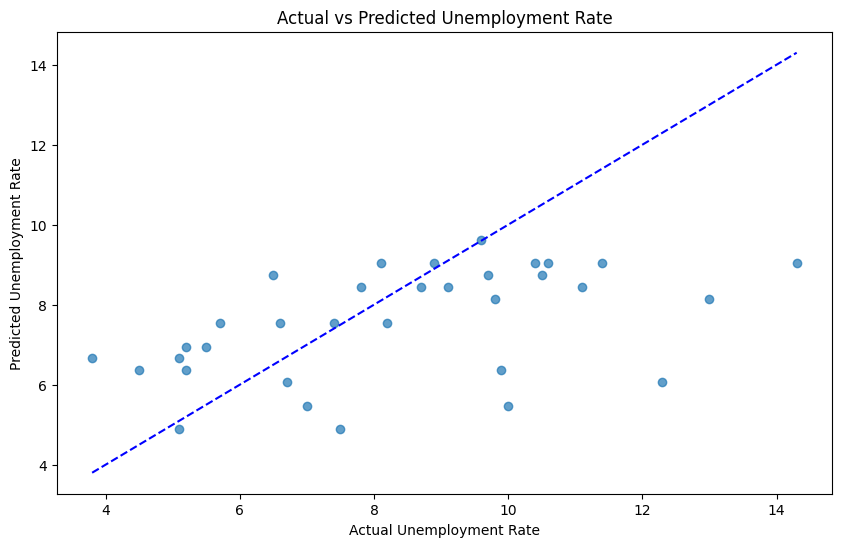

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha =0.7)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'blue', linestyle='--')
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate')
plt.show()

In [37]:
future_year = pd.DataFrame({'REF_DATE': [2025,2026,2027], 'Gender_encoded': [0,0,0]})
future_prediction = model.predict(future_year)

In [42]:
print("Predictions for future years: ")
print(pd.DataFrame({'Year': future_year['REF_DATE'], 'Predictions for future years':future_prediction}))

Predictions for future years: 
   Year  Predictions for future years
0  2025                       5.16958
1  2026                       4.27875
2  2027                       3.38792
